## Decision Tree- Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


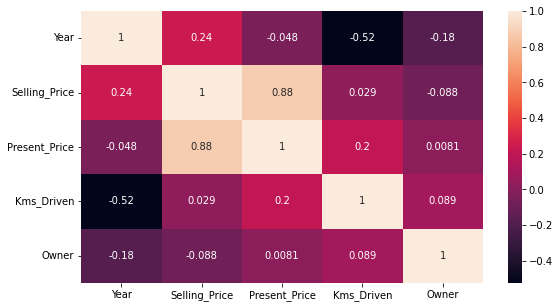

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df["vehicle_age"]=2022-df.Year

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [11]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [12]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [13]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [14]:
df2 = df.copy()

## Train test split

In [15]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [16]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [17]:
X[cat]

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
5,Diesel,Dealer,Manual
6,Petrol,Dealer,Manual
7,Diesel,Dealer,Manual
8,Diesel,Dealer,Manual
9,Diesel,Dealer,Manual


In [18]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X[cat]=enc.fit_transform(X[cat])

In [19]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,5.59,27000,2.0,0.0,1.0,0,8
1,9.54,43000,1.0,0.0,1.0,0,9
2,9.85,6900,2.0,0.0,1.0,0,5
3,4.15,5200,2.0,0.0,1.0,0,11
4,6.87,42450,1.0,0.0,1.0,0,8


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

<IPython.core.display.Javascript object>

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modeling

In [22]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [23]:
DT_model = DecisionTreeRegressor(random_state=101)

In [24]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [27]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.0,0.940647
mae,0.0,0.676393
mse,0.0,1.593069
rmse,0.0,1.262168


In [28]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.849084
test_neg_mean_absolute_error       -0.889958
test_neg_mean_squared_error        -4.482074
test_neg_root_mean_squared_error   -1.797852
dtype: float64

## Feature Importances

In [29]:
DT_model.feature_importances_

array([8.99499583e-01, 1.51521792e-02, 2.27012306e-03, 2.83681794e-04,
       1.51826831e-03, 8.25926303e-06, 8.12679058e-02])

In [30]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i

,Feature Importance
Present_Price,0.899500
vehicle_age,0.081268
Kms_Driven,0.015152
Fuel_Type,0.002270
Transmission,0.001518
Seller_Type,0.000284
Owner,0.000008


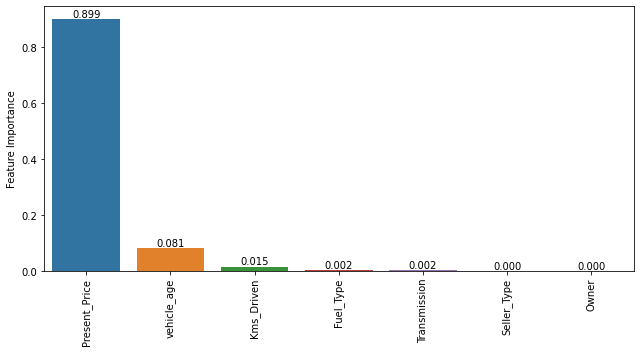

In [31]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

## Visualizing trees

In [32]:
from sklearn.tree import plot_tree

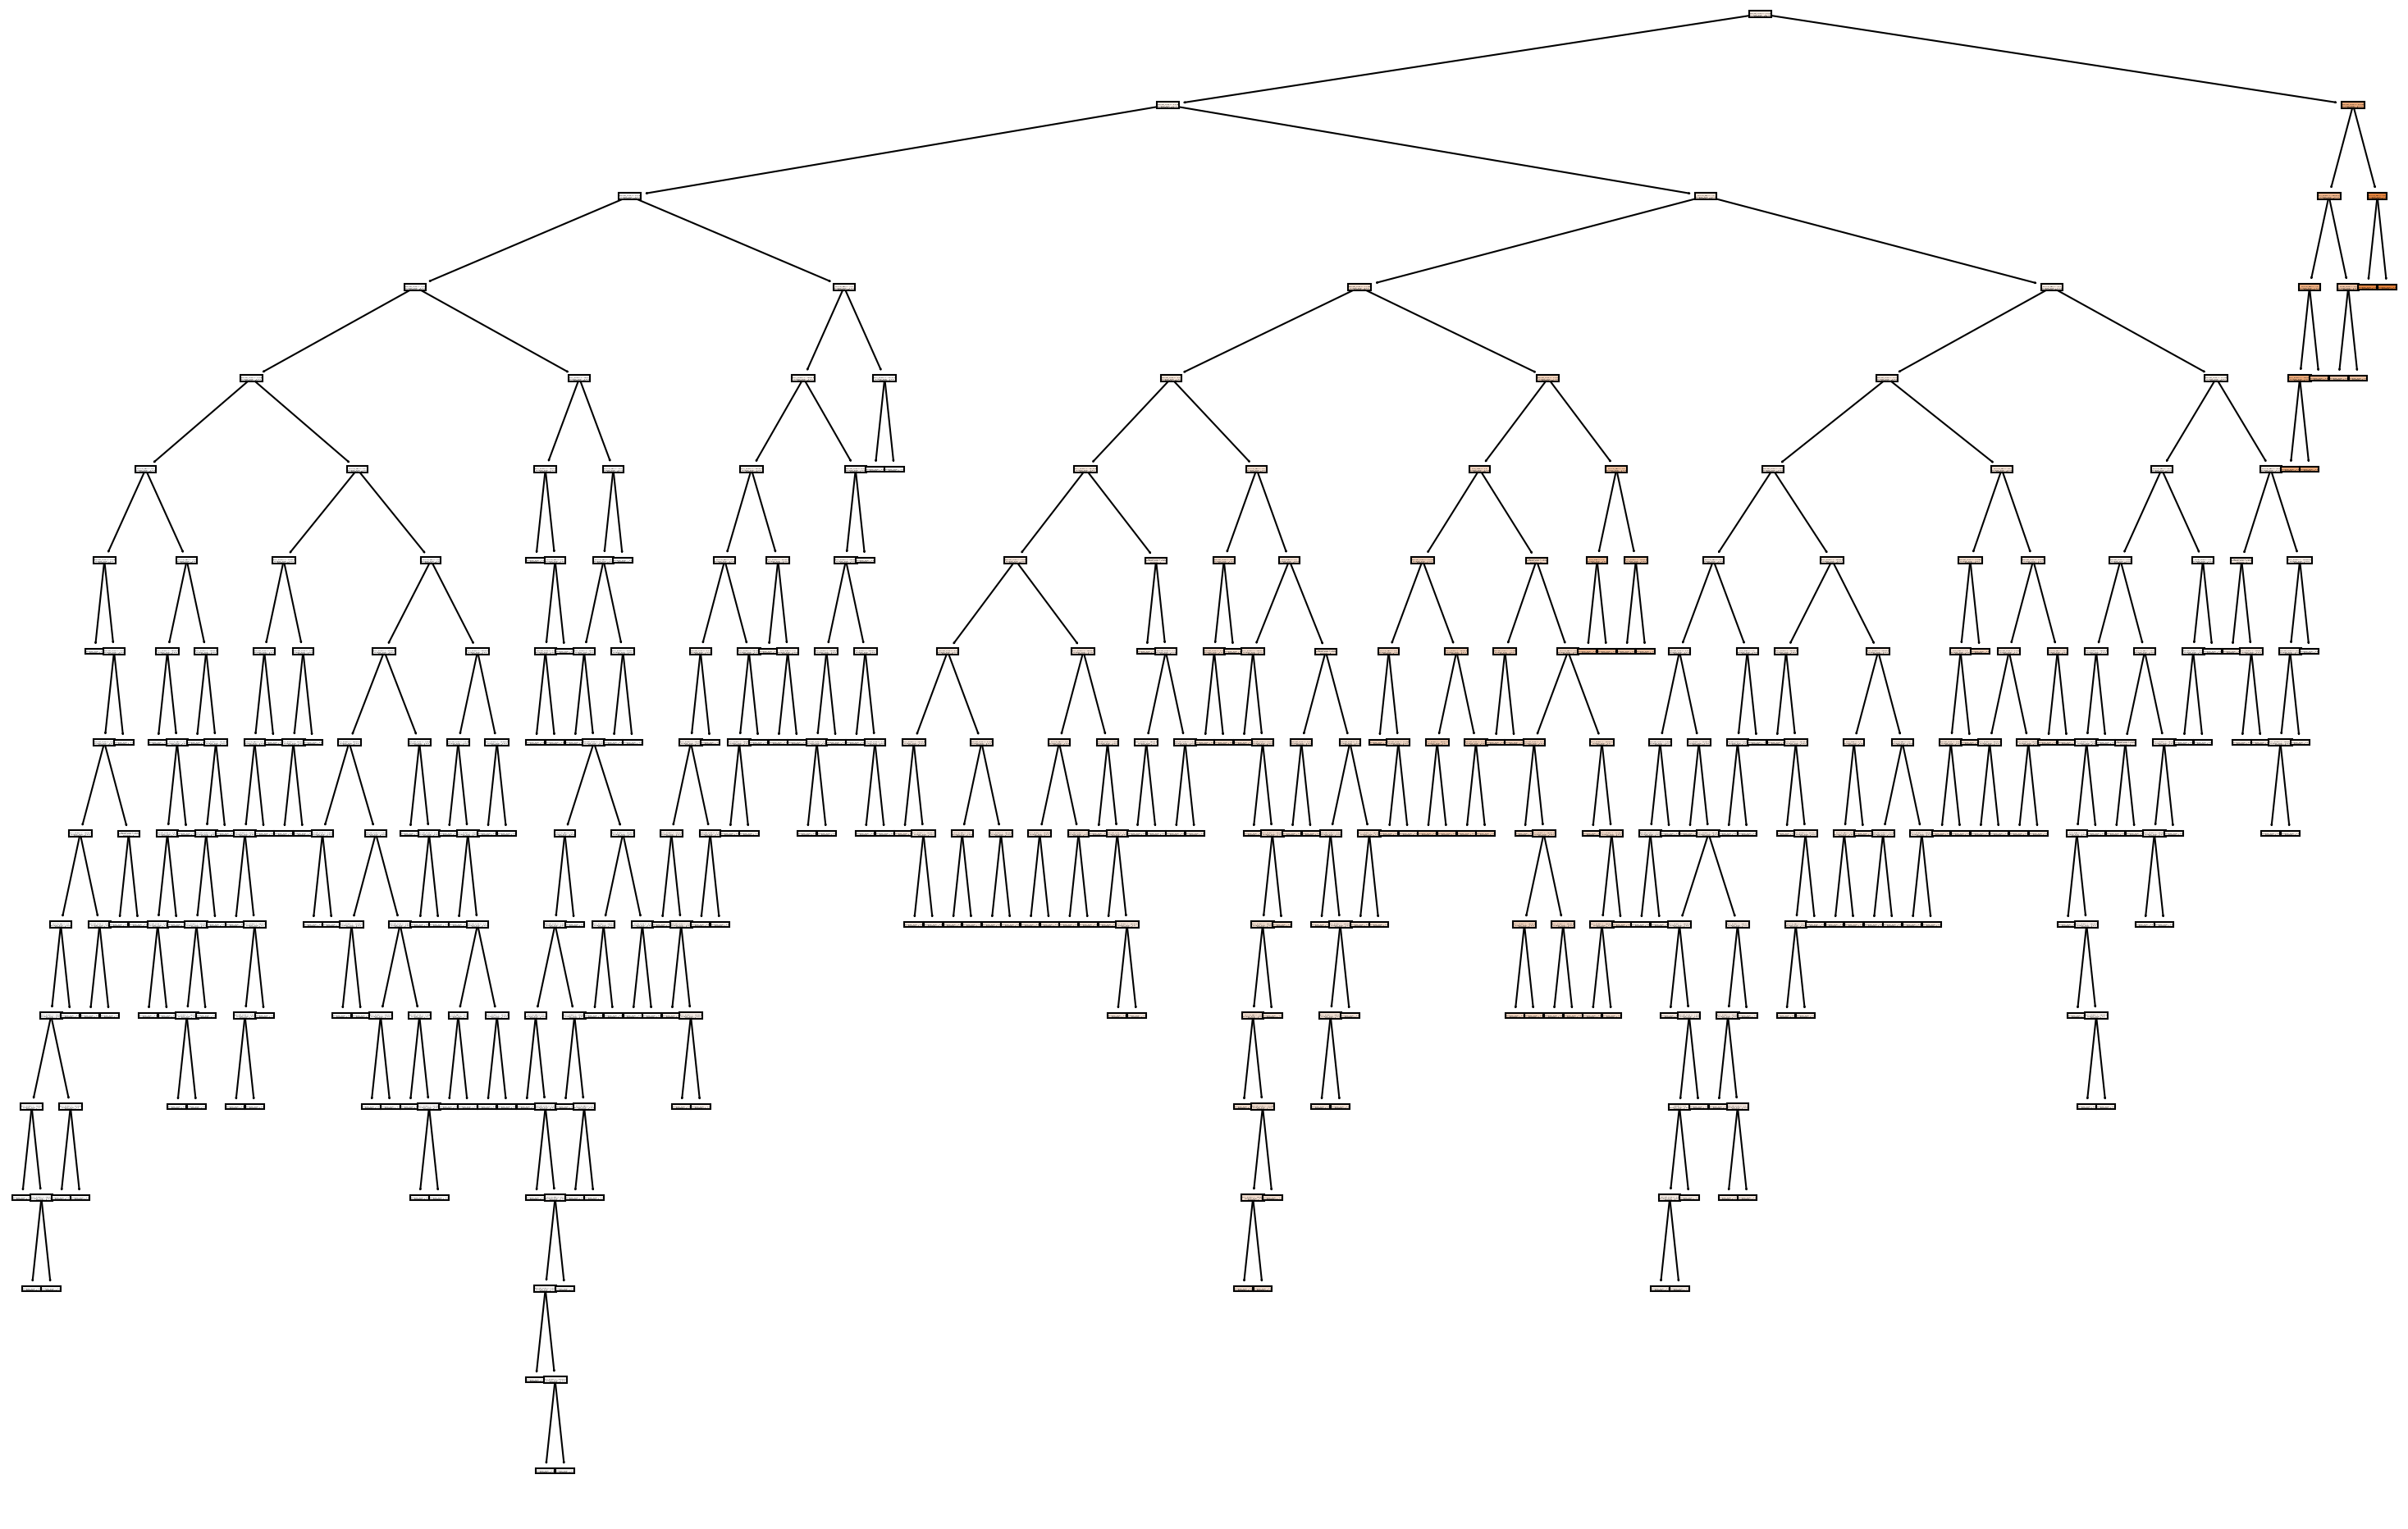

In [33]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(DT_model, filled=True, feature_names=X.columns);

In [34]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, fontsize=10);

In [35]:
pruned_tree = DecisionTreeRegressor(max_depth=3, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=101)



         train      test
R2    0.871127  0.784411
mae   1.105847  1.538641
mse   3.277820  5.786566
rmse  1.810475  2.405528




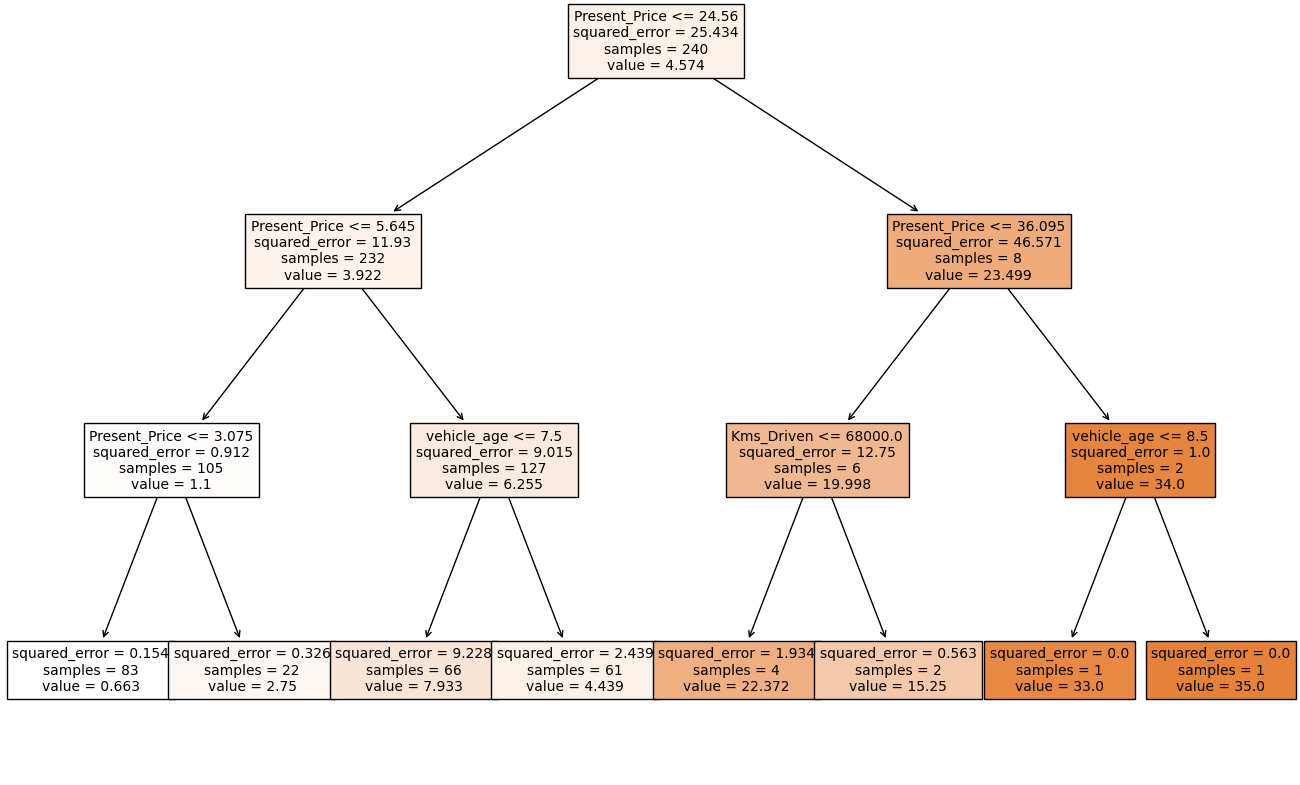

In [36]:
report_model(pruned_tree)

## GridSearch

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
model = DecisionTreeRegressor(random_state=101)

In [39]:
param_grid = {"splitter":["best", "random"],
            "max_depth": [None, 4, 5, 6, 7,8,9,10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
             "min_samples_split": [2, 3, 5, 6, 7,8,9],
             "max_features":[3, 5, 7, None]}

In [40]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [41]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [42]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=7, max_features=5, random_state=101)

In [43]:
grid_model.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [44]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013808,0.003112,0.007005,0.001671,None,3,1,2,best,"{'max_depth': None, 'max_features': 3, 'min_sa...",-1.086445,-1.117426,-2.769400,-2.113332,-3.603253,-1.625315,-3.425678,-0.911747,-0.860322,-4.342684,-2.185560,1.207837,1444
1,0.011902,0.002471,0.008399,0.002287,None,3,1,2,random,"{'max_depth': None, 'max_features': 3, 'min_sa...",-1.222312,-2.503984,-5.848863,-1.280587,-3.328974,-3.137389,-2.585330,-1.307566,-0.666752,-2.883594,-2.476535,1.426865,2162
2,0.010498,0.002061,0.006504,0.000805,None,3,1,3,best,"{'max_depth': None, 'max_features': 3, 'min_sa...",-1.426588,-1.156678,-5.808911,-1.294660,-1.346492,-1.142789,-3.063616,-0.736284,-2.560497,-4.283491,-2.282000,1.570627,1786
3,0.008900,0.000537,0.006202,0.000747,None,3,1,3,random,"{'max_depth': None, 'max_features': 3, 'min_sa...",-1.845626,-2.407815,-2.103436,-2.010382,-2.064551,-2.263701,-2.832582,-1.700354,-0.543291,-4.350552,-2.212229,0.908533,1510
4,0.009701,0.000460,0.006599,0.000663,None,3,1,5,best,"{'max_depth': None, 'max_features': 3, 'min_sa...",-2.009098,-1.338620,-5.880065,-0.950399,-3.619325,-1.884495,-2.712717,-1.128564,-0.874145,-4.102186,-2.449961,1.554319,2115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,0.018496,0.014327,0.009404,0.003435,10,None,7,7,random,"{'max_depth': 10, 'max_features': None, 'min_s...",-1.406858,-1.997209,-4.784304,-2.212326,-4.706410,-1.663253,-5.517385,-2.028436,-1.617327,-5.199516,-3.113302,1.610870,2890
3132,0.012199,0.002364,0.007701,0.001899,10,None,7,8,best,"{'max_depth': 10, 'max_features': None, 'min_s...",-1.136134,-0.992666,-1.921003,-1.138282,-0.839436,-1.350820,-2.628755,-4.944650,-1.265750,-2.819782,-1.903728,1.202618,510
3133,0.011907,0.003110,0.007296,0.002054,10,None,7,8,random,"{'max_depth': 10, 'max_features': None, 'min_s...",-1.406858,-1.997209,-4.784304,-2.212326,-4.706410,-1.663253,-5.517385,-2.028436,-1.617327,-5.199516,-3.113302,1.610870,2890
3134,0.011301,0.002494,0.007699,0.001678,10,None,7,9,best,"{'max_depth': 10, 'max_features': None, 'min_s...",-1.136134,-0.992666,-1.921003,-1.138282,-0.839436,-1.350820,-2.628755,-4.944650,-1.265750,-2.819782,-1.903728,1.202618,510


In [45]:
grid_model.best_index_

1666

In [46]:
grid_model.best_score_

-1.3843774610642996

In [47]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.990069,0.935478
mae,0.306047,0.747226
mse,0.252590,1.731811
rmse,0.502583,1.315983


In [48]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(max_depth=7, max_features=5, random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.900741
test_neg_mean_absolute_error       -0.770975
test_neg_mean_squared_error        -2.628106
test_neg_root_mean_squared_error   -1.384377
dtype: float64

In [49]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.990069,0.935478
mae,0.306047,0.747226
mse,0.252590,1.731811
rmse,0.502583,1.315983


In [50]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [51]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
50,14.90,14.500000,0.400000
174,0.38,0.182500,0.197500
234,5.50,4.907143,0.592857
66,19.75,18.000000,1.750000
178,0.35,0.302500,0.047500
42,1.95,2.707143,-0.757143
119,1.05,1.173333,-0.123333
219,4.50,4.772857,-0.272857
90,3.80,3.555000,0.245000
235,9.10,7.145455,1.954545


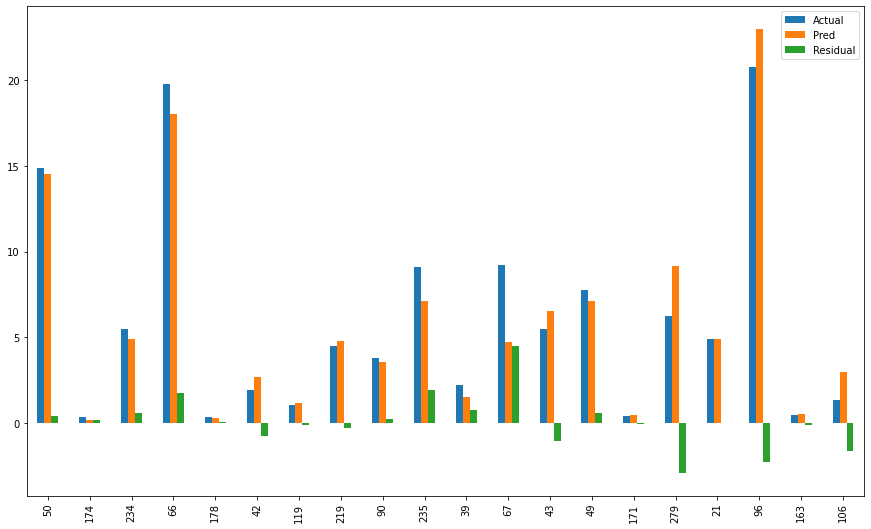

In [52]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

## Final Model

In [53]:
X=df2.drop("Selling_Price", axis=1)
y=df2.Selling_Price

In [54]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,5.59,27000,Petrol,Dealer,Manual,0,8
1,9.54,43000,Diesel,Dealer,Manual,0,9
2,9.85,6900,Petrol,Dealer,Manual,0,5
3,4.15,5200,Petrol,Dealer,Manual,0,11
4,6.87,42450,Diesel,Dealer,Manual,0,8


In [55]:
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [56]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((OrdinalEncoder(), cat), remainder="passthrough")

In [57]:
pd.DataFrame(column_trans.fit_transform(X))

,0,1,2,3,4,5,6
0,2.0,0.0,1.0,5.590,27000.0,0.0,8.0
1,1.0,0.0,1.0,9.540,43000.0,0.0,9.0
2,2.0,0.0,1.0,9.850,6900.0,0.0,5.0
3,2.0,0.0,1.0,4.150,5200.0,0.0,11.0
4,1.0,0.0,1.0,6.870,42450.0,0.0,8.0
5,1.0,0.0,1.0,9.830,2071.0,0.0,4.0
6,2.0,0.0,1.0,8.120,18796.0,0.0,7.0
7,1.0,0.0,1.0,8.610,33429.0,0.0,7.0
8,1.0,0.0,1.0,8.890,20273.0,0.0,6.0
9,1.0,0.0,1.0,8.920,42367.0,0.0,7.0


In [58]:
from sklearn.pipeline import Pipeline

operations = [("transformer", column_trans), ("tree", DecisionTreeRegressor(max_depth=7, max_features=5, random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('tree',
                 DecisionTreeRegressor(max_depth=7, max_features=5,
                                       random_state=101))])

## Prediction

In [59]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,5.59,27000,Petrol,Dealer,Manual,0,8
1,9.54,43000,Diesel,Dealer,Manual,0,9
2,9.85,6900,Petrol,Dealer,Manual,0,5
3,4.15,5200,Petrol,Dealer,Manual,0,11
4,6.87,42450,Diesel,Dealer,Manual,0,8


In [60]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [61]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,1
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [62]:
pipe_model.predict(df_samples)

array([5.83125   , 5.12583333])